In [1]:
import os; os.environ['OPENBLAS_NUM_THREADS']='1'
import numpy as np
import pandas as pd
import implicit
from scipy.sparse import coo_matrix
from implicit.evaluation import mean_average_precision_at_k
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from skimage import io

In [2]:
%%time
df = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\transactions_train.csv/transactions.csv', dtype={'article_id': str}, parse_dates=['t_dat'])
df_sub = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\sample_submission.csv/sample_submission.csv')
dfi = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\articles.csv/articles.csv', dtype={'article_id': str})
dfu = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\customers.csv/customers.csv')

Wall time: 51.4 s


In [3]:
%%time
df = df[(df['t_dat'] > '2018-09-20') & (df['t_dat'] < '2019-09-20')]
df

Wall time: 2.15 s


,t_dat,customer_id,article_id,price,sales_channel_id
48399,2018-09-21,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0583558001,0.067780,2
48400,2018-09-21,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0639677008,0.025407,2
48401,2018-09-21,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0640244003,0.033881,2
48402,2018-09-21,0006d37aaf7dd84f9bbc02f6cadcb74fd72ebf370bdc5f...,0685687004,0.016932,2
48403,2018-09-21,0006d37aaf7dd84f9bbc02f6cadcb74fd72ebf370bdc5f...,0591334004,0.010153,2
...,...,...,...,...,...
16803896,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,0764525002,0.015237,2
16803897,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,0764525002,0.015237,2
16803898,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,0703558001,0.022017,2
16803899,2019-09-19,fff98edc27fc5d64c3027bf0e3702510143d1a79c3dc9a...,0703558001,0.022017,2


In [4]:
%%time
Lespredictions=pd.read_csv('ALS-2018.csv',sep=',')
Lespredictions=Lespredictions.drop(columns='Unnamed: 0')
Lespredictions

Wall time: 4.1 s


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0568601006 0568597006 0568601007 0568597007 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0351484002 0723529001 0458543001 0673677002 06...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0529012025 0611415001 0579302001 0611415005 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0564786001 0680262001 0484398001 0680263003 06...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0629758005 0590928013 0712924003 0698286003 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0590928019 0712924008 0733935001 0590928011 06...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0759871002 0759871001 0507909001 0562245018 05...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0484398001 0573716012 0759871002 0759871001 05...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0112679048 0111609001 0111593001 0111586001 01...


In [5]:
%%time
Lespredictions=Lespredictions.set_index('customer_id')
Lespredictions

Wall time: 31.9 ms


,prediction
customer_id,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,0568601006 0568597006 0568601007 0568597007 07...
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0351484002 0723529001 0458543001 0673677002 06...
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0529012025 0611415001 0579302001 0611415005 07...
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,0564786001 0680262001 0484398001 0680263003 06...
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0629758005 0590928013 0712924003 0698286003 07...
...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,0590928019 0712924008 0733935001 0590928011 06...
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,0759871002 0759871001 0507909001 0562245018 05...
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,0484398001 0573716012 0759871002 0759871001 05...


In [6]:
%%time
Lespredictions.to_csv('3.csv')

Wall time: 7.27 s


In [7]:
%%time
minimum_items = 2
groupby_customer = df.groupby('customer_id')

Wall time: 998 µs


In [8]:
def get_rcmnd(customer_id, scores):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered, customer_prev_items

In [9]:
def plot_prev(prev_items):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, k, i)
        plt.imshow(image)

In [10]:
def plot_rcmnd(rcmnds):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, k, i)
        plt.imshow(image)

In [19]:
k = 10
customer_prev_items = groupby_customer.get_group("00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493")['article_id']
Predictions=Lespredictions.loc["00008469a21b50b3d147c97135e25b4201a8c58997f78782a0cc706645e14493"]['prediction']
Pred = Predictions.split()
path = "F:\images"

Wall time: 291 ms


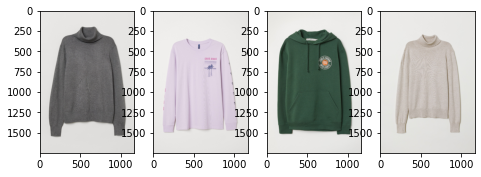

In [20]:
%%time
plot_prev(customer_prev_items)

Wall time: 1.44 s


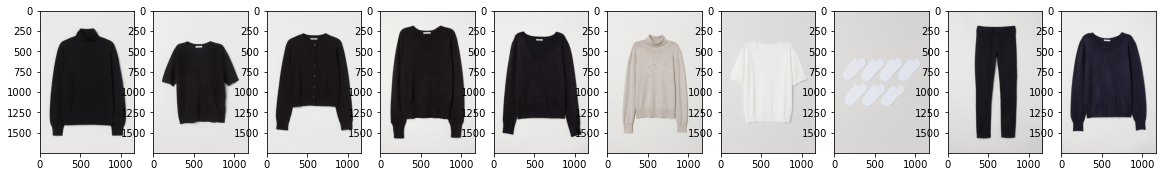

In [21]:
%%time
plot_rcmnd(Pred)

In [22]:
Pred

['0673677002',
 '0678942001',
 '0579541001',
 '0591334003',
 '0673638001',
 '0673677004',
 '0678942016',
 '0372860002',
 '0399256001',
 '0591334019',
 '0629420007',
 '0742912003']

In [15]:
customer_prev_items

2387847    0673677001
2387848    0551080020
2387849    0648414023
2387850    0673677004
Name: article_id, dtype: object

In [16]:
#création de la vérification 
newdata=pd.DataFrame(columns=dfi.columns)
def Rechercher_caracteristiques(num,newdata):
    for j in range(dfi.shape[0]):
        if (dfi.iloc[j].article_id)==(num):
            k=j
            break
    newdata=pd.DataFrame(columns=dfi.columns)
    L = dfi.loc[k]
    newdata=newdata.append(L)
    return newdata.T

In [17]:
%%time
df8=Rechercher_caracteristiques("0551080020",newdata)
df8

Wall time: 1.48 s


,12016
article_id,0551080020
product_code,551080
prod_name,Longsleeve Tee
product_type_no,255
product_type_name,T-shirt
product_group_name,Garment Upper body
graphical_appearance_no,1010014
graphical_appearance_name,Placement print
colour_group_code,61
colour_group_name,Light Purple


In [18]:
df8.to_csv('df6.csv')